In [1]:
import pandas as pd
import numpy as np
import os
import gc
from category_encoders import WOEEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
application_train = pd.read_csv("dseb63_application_train.csv", index_col=0)
application_test = pd.read_csv("dseb63_application_test.csv", index_col=0)

In [3]:
#preprocess
application_train['DAYS_EMPLOYED'].replace(365243,np.nan,inplace=True)
application_test['DAYS_EMPLOYED'].replace(365243,np.nan,inplace=True)

application_train['CODE_GENDER'].replace('XNA','F',inplace=True)
application_test['CODE_GENDER'].replace('XNA','F',inplace=True)

In [4]:
#application_train.drop('SK_ID_CURR',inplace=True,axis=1)
#SK_ID_CURR=application_test['SK_ID_CURR']
#application_test.drop('SK_ID_CURR',inplace=True,axis=1)

In [5]:
start = application_train.columns.get_loc('APARTMENTS_AVG')
end = application_train.columns.get_loc('EMERGENCYSTATE_MODE')
housing_df = application_train.iloc[:, start : end+1]

In [6]:
application_train.drop(list(housing_df.columns) + ['OBS_30_CNT_SOCIAL_CIRCLE', 'OWN_CAR_AGE'], axis=1, inplace=True)
application_test.drop(list(housing_df.columns) + ['OBS_30_CNT_SOCIAL_CIRCLE','OWN_CAR_AGE'], axis=1, inplace=True)

In [7]:
def zoom_3sigma(col, dataset, dataset_apl, verbose=True):
    '''
    Use the 3-sigma method to adjust values that 
    fall outside the range [μ - 3σ, μ + 3σ] back into that range. 
    For values greater than μ + 3σ, they will be assigned as μ + 3σ, 
    and similarly for values smaller than μ - 3σ. 
    This method helps adjust outliers within the allowable range of variation 
    and reduces the impact of bias caused by them
    Zoom in the values of a column in a dataset to 3 sigma range.

    Input:
        col : str
            Column name.
        dataset : pandas.DataFrame
            Dataset to zoom in.
        dataset_apl : pandas.DataFrame
            Dataset to apply the zoomed values.
        verbose: boolean
            Print information of high and low values or not
            default = True
    Output:
        xnew : list
            List of zoomed values.
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low = mu - 3*sigma
    high = mu + 3*sigma

    def _value(x):
        if x < low:
            return low
        elif x > high:
            return high
        else:
            return x
    xapl = dataset_apl[col]
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    if verbose:
        print(col)
        print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
        print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
        print('Low value: {:.2f}'.format(low))
        print('High value: {:.2f}'.format(high))
        print('*'*20)
    return xnew


def _count_unique(x):
    '''
    Count unique values of a pandas.Series. 
        Input:
            x : pandas.Series
                Series to count unique values.
        Output:
                Number of unique values.
    '''
    return pd.Series.nunique(x)


def find_features(df):
    ''' Find features that have more than 200 unique values.
        Input:
            df : pandas.DataFrame
                Dataset to find features.
        Output:
            cols_3sigma : list
                List of features that have more than 200 unique values.
    '''
    tbl_dis_val = df.apply(_count_unique).sort_values(ascending=False)
    cols_3sigma = tbl_dis_val[tbl_dis_val > 200].index.tolist()
    cols_3sigma = [c for c in cols_3sigma if c != 'SK_ID_CURR']
    return cols_3sigma

In [8]:
sigma = find_features(application_train)
for i in sigma:
    print(i)
    application_train[i] = zoom_3sigma(i, application_train, application_train)
    print('------------------------\n')

EXT_SOURCE_2
EXT_SOURCE_2
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.06
High value: 1.09
********************
------------------------

EXT_SOURCE_1
EXT_SOURCE_1
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.13
High value: 1.13
********************
------------------------

DAYS_BIRTH
DAYS_BIRTH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -29122.74
High value: -2955.15
********************
------------------------

DAYS_REGISTRATION
DAYS_REGISTRATION
Percentage of low: 0.24%
Percentage of high: 0.00%
Low value: -15549.40
High value: 5578.95
********************
------------------------

AMT_ANNUITY
AMT_ANNUITY
Percentage of low: 0.00%
Percentage of high: 0.96%
Low value: -16411.67
High value: 70652.14
********************
------------------------

DAYS_EMPLOYED
DAYS_EMPLOYED
Percentage of low: 1.84%
Percentage of high: 0.00%
Low value: -9402.36
High value: 4635.39
********************
------------------------

DAYS_ID_PUBLISH
D

In [9]:
sigma = find_features(application_test)
for i in sigma:
    print(i)
    application_test[i] = zoom_3sigma(i, application_test, application_test) 
    print('------------------------\n')

EXT_SOURCE_2
EXT_SOURCE_2
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.06
High value: 1.09
********************
------------------------

EXT_SOURCE_1
EXT_SOURCE_1
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -0.14
High value: 1.14
********************
------------------------

DAYS_BIRTH
DAYS_BIRTH
Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -29153.86
High value: -2904.52
********************
------------------------

DAYS_REGISTRATION
DAYS_REGISTRATION
Percentage of low: 0.27%
Percentage of high: 0.00%
Low value: -15576.37
High value: 5596.95
********************
------------------------

AMT_ANNUITY
AMT_ANNUITY
Percentage of low: 0.00%
Percentage of high: 0.96%
Low value: -16216.00
High value: 70339.84
********************
------------------------

DAYS_EMPLOYED
DAYS_EMPLOYED
Percentage of low: 1.84%
Percentage of high: 0.00%
Low value: -9386.86
High value: 4613.06
********************
------------------------

DAYS_ID_PUBLISH
D

In [10]:
def check_nan(col):
    num_nan = col.isnull().sum()
    num_per = num_nan/len(col) * 100
    col_miss = pd.concat([num_nan, num_per], axis=1, keys=['number_of_NaN', 'percentage_of_NaN']).sort_values(by='percentage_of_NaN', ascending = False).round(1)
    col_miss = col_miss[col_miss['number_of_NaN'] != 0]
    print('Num fields: ', col.shape[1])
    print('Num missing fields: ', col_miss.shape[0])
    return col_miss
check_nan(application_train)

Num fields:  73
Num missing fields:  19


,number_of_NaN,percentage_of_NaN
EXT_SOURCE_1,138525,56.3
OCCUPATION_TYPE,77106,31.3
EXT_SOURCE_3,48824,19.8
DAYS_EMPLOYED,44324,18.0
AMT_REQ_CREDIT_BUREAU_YEAR,33211,13.5
AMT_REQ_CREDIT_BUREAU_QRT,33211,13.5
AMT_REQ_CREDIT_BUREAU_MON,33211,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,33211,13.5
AMT_REQ_CREDIT_BUREAU_DAY,33211,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,33211,13.5


In [11]:
check_nan(application_test)

Num fields:  72
Num missing fields:  18


,number_of_NaN,percentage_of_NaN
EXT_SOURCE_1,34853,56.7
OCCUPATION_TYPE,19285,31.4
EXT_SOURCE_3,12141,19.7
DAYS_EMPLOYED,11050,18.0
AMT_REQ_CREDIT_BUREAU_YEAR,8308,13.5
AMT_REQ_CREDIT_BUREAU_QRT,8308,13.5
AMT_REQ_CREDIT_BUREAU_MON,8308,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,8308,13.5
AMT_REQ_CREDIT_BUREAU_DAY,8308,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,8308,13.5


In [12]:
target = application_train['TARGET']
features_train = application_train.drop('TARGET', axis=1)

# Impute numerical features using mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
numeric_features_train = features_train.select_dtypes(exclude='object')
imputed_numeric_features_train = numeric_imputer.fit_transform(numeric_features_train)

numeric_features_test = application_test.select_dtypes(exclude='object')
imputed_numeric_features_test = numeric_imputer.fit_transform(numeric_features_test)

In [13]:
check_nan(numeric_features_train)

Num fields:  60
Num missing fields:  17


,number_of_NaN,percentage_of_NaN
EXT_SOURCE_1,138525,56.3
EXT_SOURCE_3,48824,19.8
DAYS_EMPLOYED,44324,18.0
AMT_REQ_CREDIT_BUREAU_MON,33211,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,33211,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,33211,13.5
AMT_REQ_CREDIT_BUREAU_DAY,33211,13.5
AMT_REQ_CREDIT_BUREAU_QRT,33211,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,33211,13.5
DEF_60_CNT_SOCIAL_CIRCLE,805,0.3


In [14]:
# Select categorical features
categorical_features_train = features_train.select_dtypes(include='object')
categorical_features_test = application_test.select_dtypes(include='object')

# Impute categorical features using the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical_features_train = categorical_imputer.fit_transform(categorical_features_train)
imputed_categorical_features_test = categorical_imputer.transform(categorical_features_test)

# Convert the imputed data back to DataFrames with the original column names
imputed_categorical_features_train = pd.DataFrame(imputed_categorical_features_train, columns=categorical_features_train.columns)
imputed_categorical_features_test = pd.DataFrame(imputed_categorical_features_test, columns=categorical_features_test.columns)

In [15]:
categorical_features_train = features_train.select_dtypes(include='object')
# using dummy_na=False ,we perform onehot encoding without affecting data distribution
# dummy_categorical_features_train = pd.get_dummies(categorical_features_train,dummy_na=False)

# Concatenate imputed numerical and categorical features Train
imputed_features_train = pd.concat([target,pd.DataFrame(imputed_numeric_features_train, columns=numeric_features_train.columns),
                              categorical_features_train] ,axis=1)

# Impute categorical features Test using mode imputation and one-hot encoding

categorical_features_test = application_test.select_dtypes(include='object')
# dummy_categorical_features_test = pd.get_dummies(categorical_features_test,dummy_na=False)

# Concatenate imputed numerical and categorical features
imputed_features_test = pd.concat([pd.DataFrame(imputed_numeric_features_test, columns=numeric_features_test.columns),
                              categorical_features_test],
                             axis=1)

In [17]:
check_nan(imputed_features_train)

Num fields:  73
Num missing fields:  2


,number_of_NaN,percentage_of_NaN
OCCUPATION_TYPE,77106,31.3
NAME_TYPE_SUITE,1046,0.4


In [18]:
check_nan(categorical_features_train)

Num fields:  12
Num missing fields:  2


,number_of_NaN,percentage_of_NaN
OCCUPATION_TYPE,77106,31.3
NAME_TYPE_SUITE,1046,0.4


In [19]:
def do_sum(dataframe, group_cols, counted, agg_name):
    gp = dataframe[group_cols + [counted]].groupby(
        group_cols)[counted].sum().reset_index().rename(columns={counted: agg_name})
    dataframe = dataframe.merge(gp, on=group_cols, how='left')
    return dataframe


def do_mean(df, group_cols, counted, agg_name):
    gp = df[group_cols + [counted]].groupby(group_cols)[counted].mean().reset_index().rename(
        columns={counted: agg_name})
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    return df


def do_median(df, group_cols, counted, agg_name):
    gp = df[group_cols + [counted]].groupby(group_cols)[counted].median().reset_index().rename(
        columns={counted: agg_name})
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    return df


def do_std(df, group_cols, counted, agg_name):
    gp = df[group_cols + [counted]].groupby(group_cols)[counted].std().reset_index().rename(
        columns={counted: agg_name})
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    return df

In [21]:
def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
    """Create a new column for each categorical value in categorical columns using get dummies. """
    original_columns = list(df.columns)
    if not categorical_columns:
        categorical_columns = [
            col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,
                        dummy_na=nan_as_category)
    categorical_columns = [c for c in df.columns if c not in original_columns]
    return df, categorical_columns


def label_encoder(df, categorical_columns=None):
    """Encode categorical values as integers (0,1,2,3...) with pandas.factorize. """
    if not categorical_columns:
        categorical_columns = [
            col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_columns:
        df[col], uniques = pd.factorize(df[col])
    return df, categorical_columns


def get_age_label(days_birth):
    """ Return the age group label (int).  - a type of label encoder"""
    age_years = days_birth
    if age_years < 27:
        return 1
    elif age_years < 40:
        return 2
    elif age_years < 50:
        return 3
    elif age_years < 65:
        return 4
    elif age_years < 99:
        return 5
    else:
        return 0

In [22]:
def application(train, test):
    """ Process dseb63_application_train.csv and dseb63_application_test.csv and return a pandas dataframe. """
    # Read data
    # df = pd.read_csv(os.path.join(
    #     path_to_data, 'train_after_zoom.csv'), index_col=0)
    # test_df = pd.read_csv(os.path.join(
    #     path_to_data, 'test_after_zoom.csv'), index_col=0)
    df = train.copy()
    test_df = test.copy()
    
    # WOE encoding for train and test
    feats = [f for f in df.columns if f not in ['TARGET', 'SK_ID_CURR']]
    target = df['TARGET']
    enc = WOEEncoder(return_df=True)
    df_encode = enc.fit_transform(df[feats], target)
    df_encode['SK_ID_CURR'] = df['SK_ID_CURR']
    df_encode['TARGET'] = target
    df_test_enc = enc.transform(test_df[feats])
    df_test_enc['SK_ID_CURR'] = test_df['SK_ID_CURR']

    # Merge train and test data for feature engineering
    df = pd.concat([df_encode, df_test_enc]).reset_index(drop=True)
    del df_encode, df_test_enc, test_df

    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_BIRTH'] = df['DAYS_BIRTH'] * -1 / 365

    # Income by origin
    inc_by_org = df[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby(
        'ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']
    df['NEW_INC_BY_ORG'] = df['ORGANIZATION_TYPE'].map(inc_by_org)

    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], _ = pd.factorize(df[bin_feature])

    # Flag_document features - count and kurtosis
    docs = [f for f in df.columns if 'FLAG_DOC' in f]
    df['DOCUMENT_COUNT'] = df[docs].sum(axis=1)
    df['NEW_DOC_KURT'] = df[docs].kurtosis(axis=1)

    # Categorical age - based on target=1 plot
    df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x))

    # Some simple new features (percentages)
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    
    # Credit ratios
    df['CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    df['CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    df['GOODS_INCOME_RATIO'] = df['AMT_GOODS_PRICE'] / df['AMT_INCOME_TOTAL']

    # Income ratios
    df['ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
    df['INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
    df['INCOME_TO_BIRTH_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_BIRTH']
    df['INCOME_ANNUITY_DIFF'] = df['AMT_INCOME_TOTAL'] - df['AMT_ANNUITY']
    df['INCOME_EXT_RATIO'] = df['AMT_INCOME_TOTAL'] / df['EXT_SOURCE_3']
    df['CREDIT_EXT_RATIO'] = df['AMT_CREDIT'] / df['EXT_SOURCE_3']
    df['APP_AMT_INCOME_TOTAL_12_AMT_ANNUITY_ratio'] = df['AMT_INCOME_TOTAL'] / \
        12. - df['AMT_ANNUITY']  # Income per month - Annuity

    # Time ratios
    df['EMPLOYED_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['ID_TO_BIRTH_RATIO'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
    df['PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']

    # EXT_SOURCE_X FEATURE (External source)
    for function_name in ['min', 'max', 'mean', 'nanmedian']:
        feature_name = f'EXT_SOURCES_{function_name.upper()}'
        df[feature_name] = eval('np.{}'.format(function_name))(
            df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

    df['APPS_EXT_SOURCE_STD'] = df[['EXT_SOURCE_1',
                                    'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    df['APPS_EXT_SOURCE_STD'] = df['APPS_EXT_SOURCE_STD'].fillna(
        df['APPS_EXT_SOURCE_STD'].mean())

    df['APP_SCORE1_TO_EMPLOY_RATIO'] = df['EXT_SOURCE_1'] / \
        (df['DAYS_EMPLOYED'] / 365.25)
    df['EXT_SOURCES_PROD'] = df['EXT_SOURCE_1'] * \
        df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['EXT_SOURCES_WEIGHTED'] = df.EXT_SOURCE_1 * \
        2 + df.EXT_SOURCE_2 * 1 + df.EXT_SOURCE_3 * 3
    df['APP_EXT_SOURCE_2*EXT_SOURCE_3*DAYS_BIRTH'] = df['EXT_SOURCE_1'] * \
        df['EXT_SOURCE_2'] * df['DAYS_BIRTH']
    df['APP_SCORE1_TO_FAM_CNT_RATIO'] = df['EXT_SOURCE_1'] / df['CNT_FAM_MEMBERS']
    df['APP_SCORE1_TO_GOODS_RATIO'] = df['EXT_SOURCE_1'] / df['AMT_GOODS_PRICE']
    df['APP_SCORE1_TO_CREDIT_RATIO'] = df['EXT_SOURCE_1'] / df['AMT_CREDIT']
    df['APP_SCORE1_TO_SCORE2_RATIO'] = df['EXT_SOURCE_1'] / df['EXT_SOURCE_2']
    df['APP_SCORE1_TO_SCORE3_RATIO'] = df['EXT_SOURCE_1'] / df['EXT_SOURCE_3']
    df['APP_SCORE2_TO_CREDIT_RATIO'] = df['EXT_SOURCE_2'] / df['AMT_CREDIT']
    df['APP_SCORE2_TO_REGION_RATING_RATIO'] = df['EXT_SOURCE_2'] / \
        df['REGION_RATING_CLIENT']
    df['APP_SCORE2_TO_CITY_RATING_RATIO'] = df['EXT_SOURCE_2'] / \
        df['REGION_RATING_CLIENT_W_CITY']
    df['APP_SCORE2_TO_POP_RATIO'] = df['EXT_SOURCE_2'] / \
        df['REGION_POPULATION_RELATIVE']
    df['APP_SCORE2_TO_PHONE_CHANGE_RATIO'] = df['EXT_SOURCE_2'] / \
        df['DAYS_LAST_PHONE_CHANGE']
    df['EXT_SOURCE_1^2'] = df['EXT_SOURCE_1']**2
    df['EXT_SOURCE_2^2'] = df['EXT_SOURCE_2']**2
    df['EXT_SOURCE_3^2'] = df['EXT_SOURCE_3']**2
    df['APP_EXT_SOURCE_1*EXT_SOURCE_2'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2']
    df['APP_EXT_SOURCE_1*EXT_SOURCE_3'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_3']
    df['APP_EXT_SOURCE_2*EXT_SOURCE_3'] = df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['EXT_SOURCE_1 * DAYS_EMPLOYED'] = df['EXT_SOURCE_1'] * df['DAYS_EMPLOYED']
    df['EXT_SOURCE_2 * DAYS_EMPLOYED'] = df['EXT_SOURCE_2'] * df['DAYS_EMPLOYED']
    df['EXT_SOURCE_3 * DAYS_EMPLOYED'] = df['EXT_SOURCE_3'] * df['DAYS_EMPLOYED']
    df['EXT_SOURCE_1 / DAYS_BIRTH'] = df['EXT_SOURCE_1'] / df['DAYS_BIRTH']
    df['EXT_SOURCE_2 / DAYS_BIRTH'] = df['EXT_SOURCE_2'] / df['DAYS_BIRTH']
    df['EXT_SOURCE_3 / DAYS_BIRTH'] = df['EXT_SOURCE_3'] / df['DAYS_BIRTH']

    # ratio feature
    df['APP_DAYS_EMPLOYED_DAYS_BIRTH_diff'] = df['DAYS_EMPLOYED'] - df['DAYS_BIRTH']

    # Feature based on average per person
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['CREDIT_PER_PERSON'] = df['AMT_CREDIT'] / df['CNT_FAM_MEMBERS']

    # percentage of income
    df['INCOME_CREDIT_PERCENTAGE'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']

    # Ratio and diff related to children
    df['CHILDREN_RATIO'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS']
    df['CNT_NON_CHILD'] = df['CNT_FAM_MEMBERS'] - df['CNT_CHILDREN']
    df['CHILD_TO_NON_CHILD_RATIO'] = df['CNT_CHILDREN'] / df['CNT_NON_CHILD']
    df['CREDIT_PER_CHILD'] = df['AMT_CREDIT'] / (1 + df['CNT_CHILDREN'])
    df['CREDIT_PER_NON_CHILD'] = df['AMT_CREDIT'] / df['CNT_NON_CHILD']
    df['INCOME_PER_NON_CHILD'] = df['AMT_INCOME_TOTAL'] / df['CNT_NON_CHILD']
    df['INCOME_PER_CHILD'] = df['AMT_INCOME_TOTAL'] / (1 + df['CNT_CHILDREN'])

    # age bins
    df['RETIREMENT_AGE'] = (df['DAYS_BIRTH'] < -14000).astype(int)
    df['DAYS_BIRTH_QCUT'] = pd.qcut(df['DAYS_BIRTH'], q=5, labels=False)

    # long employemnt
    df['LONG_EMPLOYMENT'] = (df['DAYS_EMPLOYED'] < -2000).astype(int)

    bins = [0, 30000, 65000, 95000, 130000, 160000,
            190880, 220000, 275000, 325000, np.inf]
    labels = range(1, 11)
    df['INCOME_BAND'] = pd.cut(
        df['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False)

    # details change
    df['DAYS_DETAILS_CHANGE_MUL'] = df['DAYS_LAST_PHONE_CHANGE'] * \
        df['DAYS_REGISTRATION'] * df['DAYS_ID_PUBLISH']
    df['DAYS_DETAILS_CHANGE_SUM'] = df['DAYS_LAST_PHONE_CHANGE'] + \
        df['DAYS_REGISTRATION'] + df['DAYS_ID_PUBLISH']

    # enquires
    df['AMT_ENQ_SUM'] = df['AMT_REQ_CREDIT_BUREAU_HOUR'] + df['AMT_REQ_CREDIT_BUREAU_DAY'] + df['AMT_REQ_CREDIT_BUREAU_WEEK'] + df[
        'AMT_REQ_CREDIT_BUREAU_MON'] + df['AMT_REQ_CREDIT_BUREAU_QRT'] + df['AMT_REQ_CREDIT_BUREAU_YEAR']
    df['ENQ_CREDIT_RATIO'] = df['AMT_ENQ_SUM'] / df['AMT_CREDIT']

    group = ['ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE',
             'OCCUPATION_TYPE', 'AGE_RANGE', 'CODE_GENDER']
    df = do_median(df, group, 'EXT_SOURCES_MEAN', 'GROUP_EXT_SOURCES_MEDIAN')
    df = do_std(df, group, 'EXT_SOURCES_MEAN', 'GROUP_EXT_SOURCES_STD')
    df = do_mean(df, group, 'AMT_INCOME_TOTAL', 'GROUP_INCOME_MEAN')
    df = do_std(df, group, 'AMT_INCOME_TOTAL', 'GROUP_INCOME_STD')
    df = do_mean(df, group, 'CREDIT_TO_ANNUITY_RATIO',
                 'GROUP_CREDIT_TO_ANNUITY_MEAN')
    df = do_std(df, group, 'CREDIT_TO_ANNUITY_RATIO',
                'GROUP_CREDIT_TO_ANNUITY_STD')
    df = do_mean(df, group, 'AMT_CREDIT', 'GROUP_CREDIT_MEAN')
    df = do_mean(df, group, 'AMT_ANNUITY', 'GROUP_ANNUITY_MEAN')
    df = do_std(df, group, 'AMT_ANNUITY', 'GROUP_ANNUITY_STD')
    
    
    gc.collect()
    return df

In [24]:
train_ft_en = application(imputed_features_train, imputed_features_test)

In [25]:
train_ft_en.shape

(307511, 151)

In [ ]:
target.to_csv('target.csv', index=False)

In [ ]:
train_ft_en.drop(['TARGET'], axis=1, inplace=True)
check_nan(train_ft_en)

Num fields:  150
Num missing fields:  4


,number_of_NaN,percentage_of_NaN
GROUP_ANNUITY_STD,879,0.3
GROUP_CREDIT_TO_ANNUITY_STD,879,0.3
GROUP_INCOME_STD,879,0.3
GROUP_EXT_SOURCES_STD,879,0.3


In [28]:
train_ft_en1=train_ft_en.copy()

<Axes: >

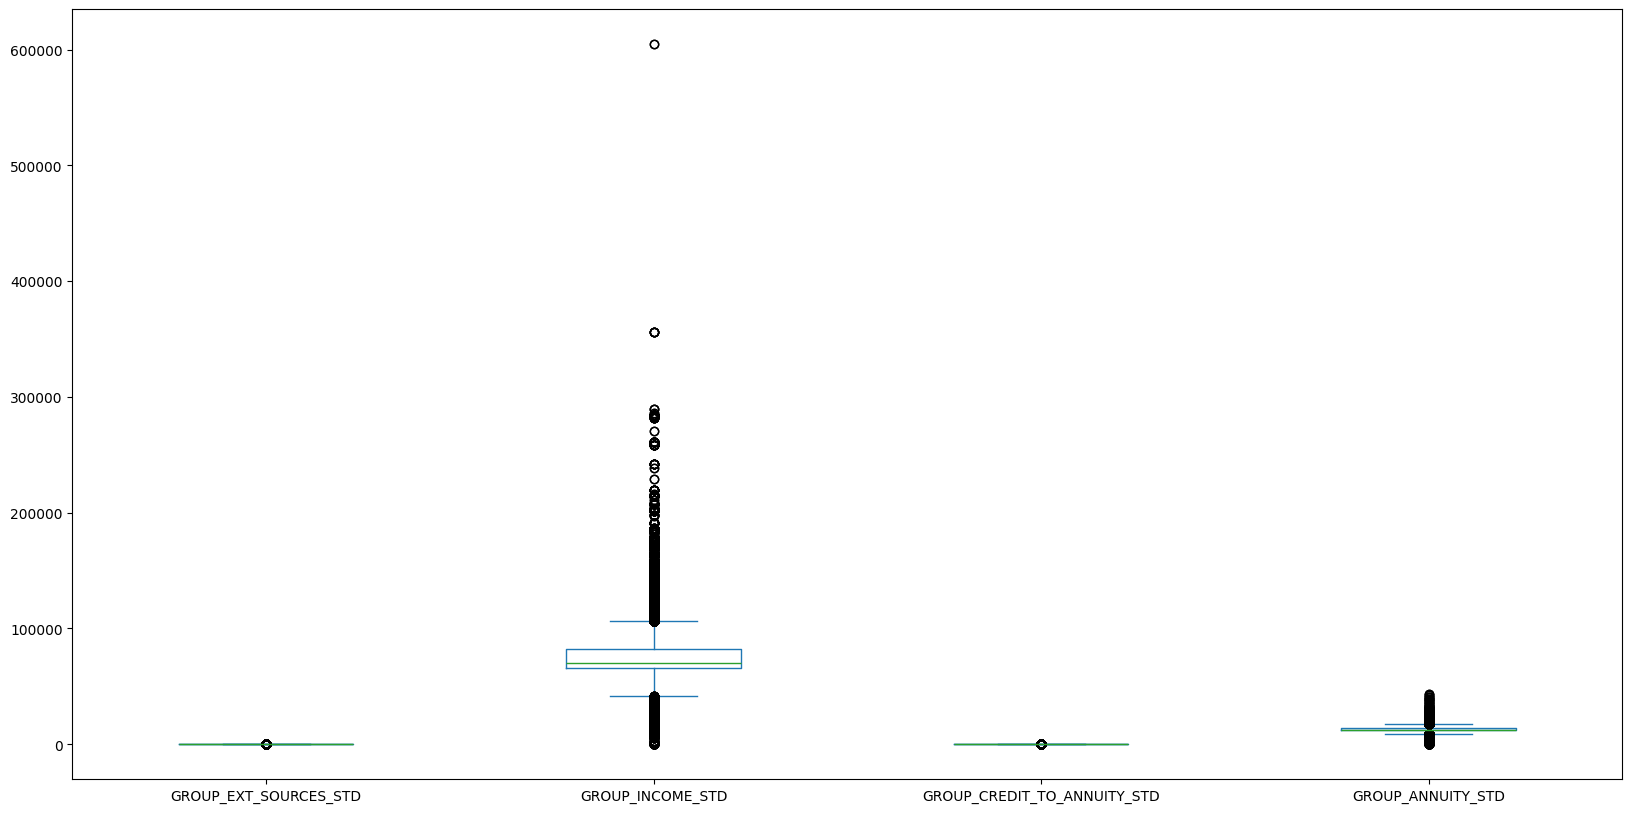

In [29]:
null_col=train_ft_en1.columns[train_ft_en1.isnull().any()]
train_ft_en1[null_col.to_list()].plot(kind='box',figsize=(20,10))

In [30]:
train_ft_en1[null_col.to_list()].describe()

,GROUP_EXT_SOURCES_STD,GROUP_INCOME_STD,GROUP_CREDIT_TO_ANNUITY_STD,GROUP_ANNUITY_STD
count,306632.000000,306632.000000,306632.000000,306632.000000
mean,0.104907,75291.215740,7.677741,13159.812982
std,0.009222,18407.717159,0.560994,1741.819225
min,0.000352,0.000000,0.000000,0.000000
25%,0.099447,65798.601746,7.490862,12076.608547
50%,0.105923,70172.892299,7.691306,12744.427282
75%,0.109424,82139.777823,7.836977,14118.422005
max,0.356561,604576.297914,19.695932,43427.670073


In [41]:
null_df=train_ft_en1[['GROUP_INCOME_STD','GROUP_EXT_SOURCES_STD','GROUP_CREDIT_TO_ANNUITY_STD', 'GROUP_ANNUITY_STD']] 

imputer =SimpleImputer(strategy='mean')
imputed_null = imputer.fit_transform(null_df)
imputed_null = pd.DataFrame(imputed_null, columns=null_df.columns)
train_ft_en[['GROUP_INCOME_STD','GROUP_EXT_SOURCES_STD','GROUP_CREDIT_TO_ANNUITY_STD', 'GROUP_ANNUITY_STD']] = imputed_null

In [ ]:
check_nan(train_ft_en)

In [ ]:
train_ft_en.drop('GROUP_INCOME_STD', axis=1, inplace=True)

In the ultimate version I used for training, I had dropped the column GROUP_INCOME_STD but we had little time left so I didn't merge again with the latest export.

In [43]:
train_ft_en.to_csv('FeatureEngineering.csv', index=False)